# Homework 6

For this homework, you'll be looking at the survey data gathered from the last exam. For each cell, answer the question either with code or text, as specified.

The data is here: https://drive.google.com/file/d/1-0d9sGptmBTbzf4jRGYDE8pWwxz0d-0z/view?usp=sharing

Copy this notebook, fill it out, and then submit it.


# Question 1

Write code to load in the data in a dataframe.

In [159]:
import pandas as pd
import numpy as np
data = pd.read_csv('MidtermSurvey_Processed.csv')
data = data[['Time', 'Hours_Studied', 'Friend', 'Fair', 'Lectures',
       'Assignments', 'Sleep', 'XP', 'Class', 'Grade', 'Mystery']]
data.dropna(how='all', inplace=True)
data


,Time,Hours_Studied,Friend,Fair,Lectures,Assignments,Sleep,XP,Class,Grade,Mystery
0,4:45:00 PM,4.0,No,Yes,Yes,Yes,7.0,No,Yes,66.509746,30.644589
1,4:45:14 PM,4.0,Yes,Kinda,Kinda,Kinda,3.0,No,Yes,73.447272,37.825654
2,4:40:00 PM,4.0,Yes,Yes,No,Yes,8.0,No,Yes,61.562473,32.678616
3,4:45:00 PM,7.0,No,Yes,No,No,8.0,No,Yes,53.426324,30.805367
4,4:45:55 PM,2.0,No,Yes,Yes,Yes,6.0,Yes,Yes,79.710070,40.256162
5,4:45:00 PM,4.0,No,Yes,Yes,Yes,8.0,Yes,No,42.375326,22.244835
6,4:46:07 PM,6.0,No,Kinda,Yes,No,5.0,No,Yes,62.747236,34.910625
7,4:44:00 PM,3.5,Yes,Yes,Yes,Yes,8.0,No,Yes,56.458508,30.127659
8,4:40:00 PM,5.0,Kinda,No,No,No,8.0,Kinda,Yes,63.504784,31.478506
9,4:44:00 PM,4.0,Yes,Yes,Yes,Yes,6.0,No,Yes,54.583668,32.185372


# Question 2

Create a column that measures, in minutes, how long each student took for their exam. Print the column at the end.

In [160]:
import re
import datetime
from datetime import datetime
from datetime import timedelta
from datetime import time
start_time = datetime(2023, 11, 21, 3, 30)

def get_duration(x):
    start_time = datetime(2023, 11, 21, 3, 30)
    x = str(x)
    if x == 'nan':
        return None
    else:
        ts = re.split(':| ', x)
        end_time = datetime(2023, 11, 21, int(ts[0]), int(ts[1]))
        dur = ((end_time-start_time).seconds)/60
        return dur
    


data['Minutes_Exam'] = data['Time'].apply(lambda x: get_duration(x))
data['Minutes_Exam']

0      75.0
1      75.0
2      70.0
3      75.0
4      75.0
       ... 
241     NaN
242     NaN
243     NaN
244     NaN
245     NaN
Name: Minutes_Exam, Length: 246, dtype: float64

# Question 3

Create a graph, comparing the distributions of the grades of students who thought the exam was fair, kind of fair, or not fair. (Note: If you create a graph that does not do a good job visuaizing this, you will loose points. For example, if you make a pie chart somehow, the graders will have no mercy).

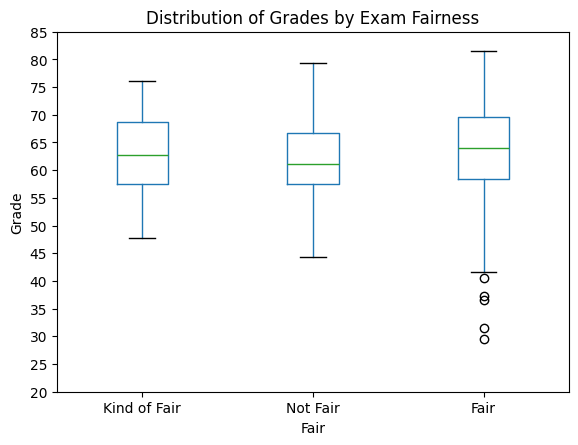

In [161]:
import matplotlib.pyplot as plt

data.boxplot(column='Grade', by='Fair', grid=False)
plt.title('Distribution of Grades by Exam Fairness')
plt.suptitle('')
plt.ylabel('Grade')
plt.yticks(np.arange(20, 90, 5))
plt.xticks(ticks=[1,2,3], labels=['Kind of Fair', 'Not Fair', 'Fair'])
plt.show()

# Question 4

Do a hypothesis test to see if the distributions of students who thought the exam was fair, kinda fair, or unfair have a stastically significant difference in mean. Print your p-value.

In [162]:
import scipy.stats as stats
fair = data[data['Fair'] == 'Yes']['Grade']
kinda_fair = data[data['Fair'] == 'Kinda']['Grade']
not_fair = data[data['Fair'] == 'No']['Grade']
stats.f_oneway(fair, kinda_fair, not_fair)



F_onewayResult(statistic=0.1756754656214435, pvalue=0.8389966340907092)

# Question 5

Does studying more improve your score? Find out, and summarize the results below in text format. If it does not, speculate as to why.

r-value: 0.06286069182995388   p_value: 0.32615834241685104


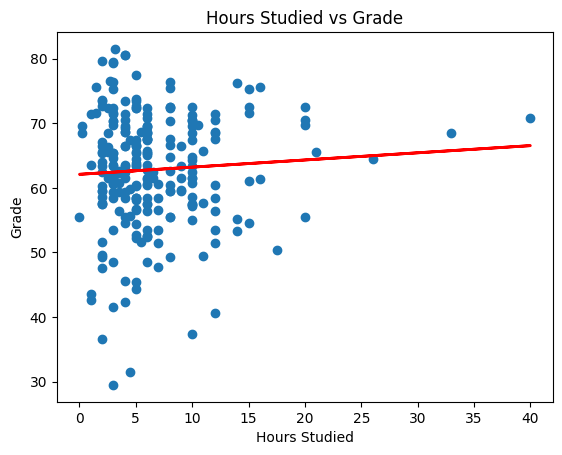

r^2 value: 0.0039514665773404305


In [163]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr


r_value, p_value = pearsonr(data['Hours_Studied'], data['Grade'])
print("r-value: "+ str(r_value)  + "   p_value: " + str(p_value))

x = data['Hours_Studied'].values.reshape(-1,1)
y = data['Grade'].values.reshape(-1,1)

model = LinearRegression()
model.fit(x,y)

plt.scatter(data['Hours_Studied'], data['Grade'])
plt.plot(data['Hours_Studied'], model.predict(x), color = 'red', linewidth=2)
plt.xlabel("Hours Studied")
plt.ylabel("Grade")
plt.title("Hours Studied vs Grade")
plt.show()
print("r^2 value: " + str(r_value**2))


It does not seem that studying more impacted score. 

From performing linear regression, we can see that the R<sup>2</sup> value = 0.00395 which suggests a very low goodness of fit for the best line of fit calculated.

We can also see that the R value = 0.0629 which also suggests that there is an extremely low positive correlation between hours studied and score

# Question 6

Make another graph based on a question you think might be interesting.

Does Mystery have an affect on Grade?

r-value: 0.915726748448787   p_value: 1.3321077128841547e-98


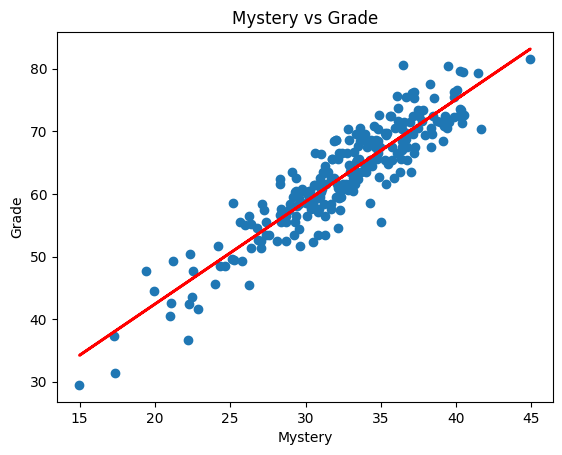

r^2 value: 0.838555477824588


In [164]:
r_value, p_value = pearsonr(data['Mystery'], data['Grade'])
print("r-value: "+ str(r_value)  + "   p_value: " + str(p_value))

x = data['Mystery'].values.reshape(-1,1)
y = data['Grade'].values.reshape(-1,1)

model = LinearRegression()
model.fit(x,y)

plt.scatter(data['Mystery'], data['Grade'])
plt.plot(data['Mystery'], model.predict(x), color = 'red', linewidth=2)
plt.xlabel("Mystery")
plt.ylabel("Grade")
plt.title("Mystery vs Grade")
plt.show()
print("r^2 value: " + str(r_value**2))

# Question 7

Do a hypothesis test on something you think is interesting.

In [165]:
import scipy as sp
import scipy.stats
# is there a significant difference in exam fairness and helpfulness of lectures
# null: there is no association between exam fairness and helpfulness of lectures
# alternative: there is an association between exam fairness and helpfulness of lectures
# chi-squared test for independence
crosstab = pd.crosstab(data['Fair'], data['Lectures'])
print(crosstab)
scipy.stats.chi2_contingency(crosstab)

Lectures  Kinda  No  Yes
Fair                    
Kinda        16   7   18
No            2  11   15
Yes          28  34  115


Chi2ContingencyResult(statistic=19.52177453190717, pvalue=0.0006205097409095631, dof=4, expected_freq=array([[  7.66666667,   8.66666667,  24.66666667],
       [  5.23577236,   5.91869919,  16.84552846],
       [ 33.09756098,  37.41463415, 106.48780488]]))

The p-value is very very low. Thus, there is significant evidence to reject the null hypothesis. There is a significant association between exam fairness and helpfulness of lectures. 

# Question 8

Write code that trains a regression algorithm over the data, predicting grade. You may not use the "mystery" column, but you may use all other columns. You must get an R^2 value > .09.

(Note: This is going to be involved! You'll have to pick a regression algorithm and possibly do some preprocessing. Use what you learned in homework 5 to train it. You don't need a test set, since it's regression!)

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

features = data.copy()

def change_categorical(x):
    if x == 'Yes':
        return 2
    elif x == 'No':
        return 0
    elif x == 'Kinda':
        return 1

features['Friend'] = features['Friend'].apply(change_categorical)
features['Lectures'] = features['Lectures'].apply(change_categorical)
features['Assignments'] = features['Assignments'].apply(change_categorical)
features['Class'] = features['Class'].apply(change_categorical)
features['Fair'] = features['Fair'].apply(change_categorical)
features['XP'] = features['XP'].apply(change_categorical)


features_other = features[['Hours_Studied', 'Friend', 'Fair', 'Lectures', 'Assignments','Sleep', 'XP', 'Class']]
target = features['Grade']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(features_other)

model = LinearRegression()
model.fit(x_scaled, target)

y_pred = model.predict(x_scaled)

r2_score(target, y_pred)
# R^2 = .11634


0.11633541718855922

# Question 9

Is your model any good? What does its performance tell you about the input variables' relationship to your grade?

My model is not that great. Because the R^2 value is so low, we can see that the input variables are not closely related to the grade they got. 

# Question 10

Execute the same code with the addition of the mystery column. You must get an R^2 higher than .7. Print your R^2 value.

In [167]:
features = data.copy()

def change_categorical(x):
    if x == 'Yes':
        return 2
    elif x == 'No':
        return 0
    elif x == 'Kinda':
        return 1

features['Friend'] = features['Friend'].apply(change_categorical)
features['Lectures'] = features['Lectures'].apply(change_categorical)
features['Assignments'] = features['Assignments'].apply(change_categorical)
features['Class'] = features['Class'].apply(change_categorical)
features['Fair'] = features['Fair'].apply(change_categorical)
features['XP'] = features['XP'].apply(change_categorical)


features_other = features[['Hours_Studied', 'Friend', 'Fair', 'Lectures', 'Assignments','Sleep', 'XP', 'Class', 'Mystery']]
target = features['Grade']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(features_other)

model = LinearRegression()
model.fit(x_scaled, target)

y_pred = model.predict(x_scaled)

r2_score(target, y_pred)

0.8434847640456538

What is the mystery column, and why did it boost your model's accuracy so much?

The mystery column is probably something strongly correlated with the grade column which is why it boosted the models accuracy so much. I think it is: (predicted grade/2) + or - (a little extra)